In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from matplotlib.patches import Circle
import random
import pickle
from google.colab import drive

In [2]:
drive.mount('/content/drive/', force_remount=False)

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
%cd '/content/drive/My Drive'

/content/drive/My Drive


In [ ]:
#!unzip data_hand_pose_1_11.zip

In [4]:
with open('data_hand_pose_1_11.pickle','rb') as data_1:
  mydict1=pickle.load(data_1)

In [5]:
images=mydict1['images']
labels=mydict1['joints']
print("Shape of image vector:{}\nShape of labels vector:{}".format(np.shape(images),np.shape(labels)))
labels = labels.reshape((labels.shape[0],labels.shape[1]*labels.shape[2]))
print(labels.shape)

Shape of image vector:(40052, 64, 64, 3)
Shape of labels vector:(40052, 21, 2)
(40052, 42)


In [6]:
import tensorflow as tf
#%tensorflow_version 1
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, Convolution2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout, Conv2D,MaxPool2D, ZeroPadding2D
from tensorflow.keras.callbacks import CSVLogger

**Base Model with 2 Conv Layer**

In [8]:
#To deploy base model uncommand this cell
model=Sequential()

model.add(Convolution2D(32,kernel_size=[3,3],strides=[2,2],padding='valid',use_bias=False, activation='relu',input_shape=(images.shape[1:4])))
model.add(LeakyReLU(alpha = 0.1))
model.add(Convolution2D(64, (3,3), padding='valid', use_bias=False))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(42))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 31, 31, 32)        864       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 64)        18432     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               1605760   
_________________________________________________________________
dropout (Dropout)            (None, 128)               0

**Model with 4 Conv layers**

In [7]:
model=Sequential()

model.add(Convolution2D(32,kernel_size=[3,3],strides=[2,2],padding='valid',use_bias=False, activation='relu',input_shape=(images.shape[1:4])))
model.add(Dropout(0.1))         
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(64, (3,3), padding='valid', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(128, (3,3), padding='valid', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(32, (3,3), padding='valid', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(42))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 31, 31, 32)        864       
_________________________________________________________________
dropout (Dropout)            (None, 31, 31, 32)        0         
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 31, 31, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 31, 31, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 64)        18432     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 29, 29, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 29, 29, 64)        2

In [8]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
csv_logger = CSVLogger('train_final.log')

In [9]:
m=model.fit(images[:32000],labels[:32000],epochs = 30,batch_size = 32,validation_data=(images[32000:],labels[32000:]),callbacks=[csv_logger])

Epoch 1/30
1000/1000 [==============================] - 21s 21ms/step - loss: 10.9077 - mae: 2.3419 - val_loss: 13.2589 - val_mae: 2.7240
Epoch 2/30
1000/1000 [==============================] - 21s 21ms/step - loss: 5.5239 - mae: 1.6980 - val_loss: 13.9811 - val_mae: 2.7836
Epoch 3/30
1000/1000 [==============================] - 21s 21ms/step - loss: 4.5217 - mae: 1.5421 - val_loss: 10.3765 - val_mae: 2.3815
Epoch 4/30
1000/1000 [==============================] - 21s 21ms/step - loss: 4.0140 - mae: 1.4557 - val_loss: 11.6249 - val_mae: 2.5323
Epoch 5/30
1000/1000 [==============================] - 21s 21ms/step - loss: 3.6448 - mae: 1.3926 - val_loss: 10.6006 - val_mae: 2.4154
Epoch 6/30
1000/1000 [==============================] - 21s 21ms/step - loss: 3.3986 - mae: 1.3436 - val_loss: 10.3297 - val_mae: 2.3726
Epoch 7/30
1000/1000 [==============================] - 21s 21ms/step - loss: 3.2653 - mae: 1.3225 - val_loss: 8.8809 - val_mae: 2.1912
Epoch 8/30
1000/1000 [===================

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


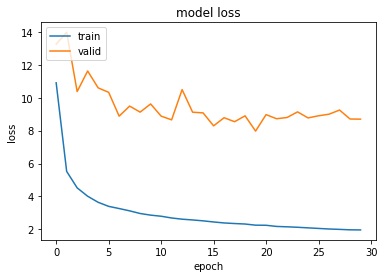

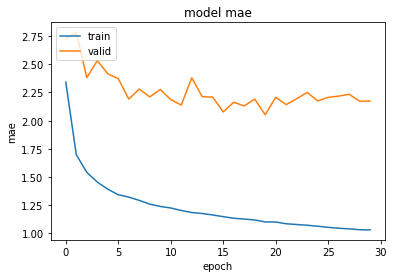

In [10]:
print(m.history.keys())
plt.plot(m.history['loss'])
plt.plot(m.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()
plt.plot(m.history['mae'])
plt.plot(m.history['val_mae'])
plt.title('model mae')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

In [11]:
model.save('model_final.h5')

**Loss and Mae plots for simple model with only 2 CNN layers**

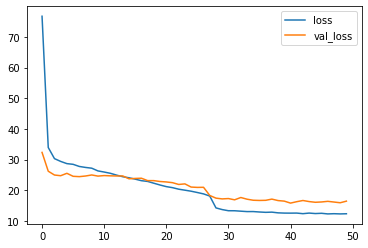

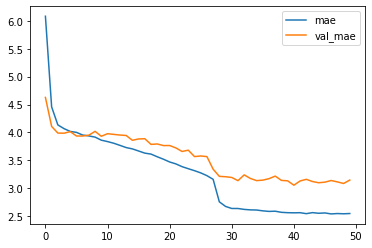

In [13]:
import pandas as pd
import pylab as plt

# Create dataframe
file_name = "train_base.log"
df = pd.read_csv(file_name)
df[['loss','val_loss']].plot()
plt.show()
df[['mae','val_mae']].plot()
plt.show()

**Last Model with 4 Conv layers trained 50 epoch with batch size=64**

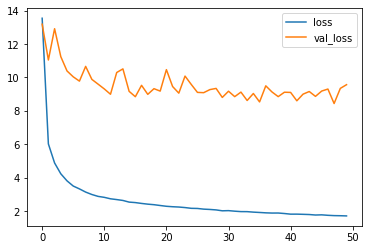

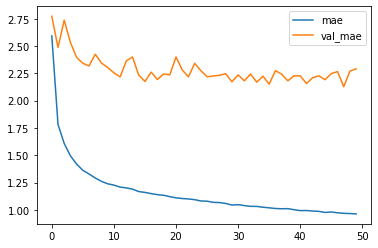

In [32]:
file_name = "train_last.log"
df3 = pd.read_csv(file_name)
df3[['loss','val_loss']].plot()
plt.show()
df3[['mae','val_mae']].plot()
plt.show()

**Final Model with 4 Conv layers trained 30 epochs with batch size=32**

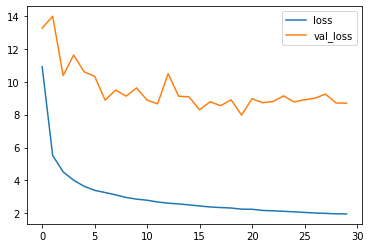

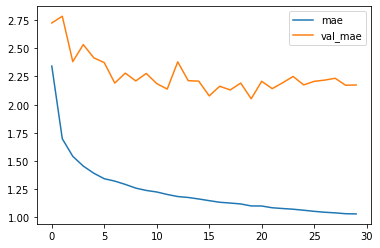

In [12]:
file_name = "train_final.log"
df3 = pd.read_csv(file_name)
df3[['loss','val_loss']].plot()
plt.show()
df3[['mae','val_mae']].plot()
plt.show()

**To visualize model predictions:**

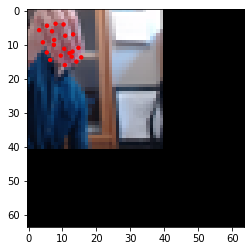

In [13]:
randomi = random.randint(3200,40020)
preds = model.predict(images[randomi:randomi+1])

fig, ax = plt.subplots(1)
ax.set_aspect('equal')
ax.imshow(images[randomi])

for xx, yy in preds[0].reshape((21,2)):
    circ = Circle((xx,yy),0.5,color='red')
    ax.add_patch(circ)

In [14]:
myimage=Image.open(r'/content/drive/My Drive/my2.jpeg','r')
myimage=np.array(np.array(myimage))
myimage.shape
c=myimage.view()
c=np.reshape(c,(-1,64,64,3))


In [15]:
preds = model.predict(c)

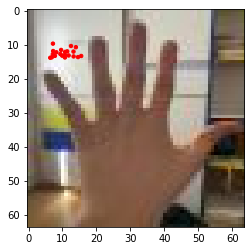

In [16]:
fig, ax = plt.subplots(1)
ax.set_aspect('equal')
ax.imshow(myimage)

for xx, yy in preds[0].reshape((21,2)):
    circ = Circle((xx,yy),0.5,color='red')
    ax.add_patch(circ)